In [6]:
#from scipy.stats import futil
from ggplot import *
import pandas as pd
import numpy as np

In [7]:
%matplotlib inline

In [8]:
df = pd.read_csv("baseball-pitches-clean.csv")
df = df[['pitch_time', 'inning', 'pitcher_name', 'hitter_name', 'pitch_type', 
         'px', 'pz', 'pitch_name', 'start_speed', 'end_speed', 'type_confidence']]
df.head()

,pitch_time,inning,pitcher_name,hitter_name,pitch_type,px,pz,pitch_name,start_speed,end_speed,type_confidence
0,2013-10-01 20:07:43 -0400,1,Francisco Liriano,Shin-Soo Choo,B,0.628,1.547,Fastball,93.2,85.3,0.894
1,2013-10-01 20:07:57 -0400,1,Francisco Liriano,Shin-Soo Choo,S,0.545,3.069,Fastball,93.4,85.6,0.895
2,2013-10-01 20:08:12 -0400,1,Francisco Liriano,Shin-Soo Choo,S,0.120,1.826,Slider,89.1,82.8,0.931
3,2013-10-01 20:08:31 -0400,1,Francisco Liriano,Shin-Soo Choo,S,-0.229,1.667,Slider,90.0,83.3,0.926
4,2013-10-01 20:09:09 -0400,1,Francisco Liriano,Ryan Ludwick,B,-1.917,0.438,Slider,87.7,81.6,0.915


# Getting a feel for what's going on

## geom_point

I usually start by making some really simple plots like scatterplots and histograms just to make sure that things make sense.
px and pz are the coordinates of a pitch as they cross home plate. Let's plot these and see if our data makes sense.

C:\Users\seeth_000\Anaconda2\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


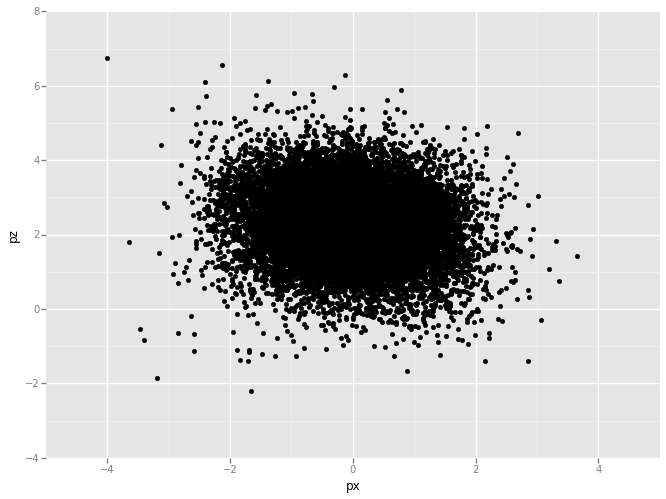

<ggplot: (34537907)>

In [9]:
ggplot(df, aes(x='px', y='pz')) + geom_point()

What about the pitch speed?

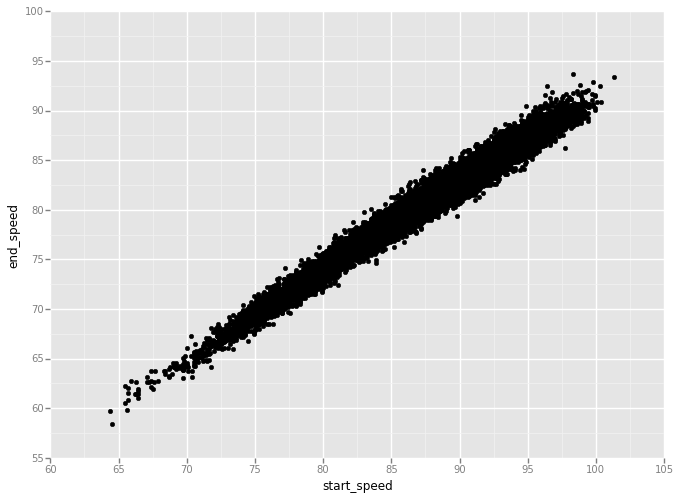

<ggplot: (34612954)>

In [10]:
ggplot(aes(x='start_speed', y='end_speed'), data=df) + geom_point()

## geom_hist

A better way to inspect pitch speed might be to look at a distribution of the data.
Does this make sense? Let's consult the source of all true wisdom: https://answers.yahoo.com/question/index?qid=20080126131031AAwVCNk

stat_bin: binwidth defaulted to range/30.
    Use 'binwidth = x' to adjust this.


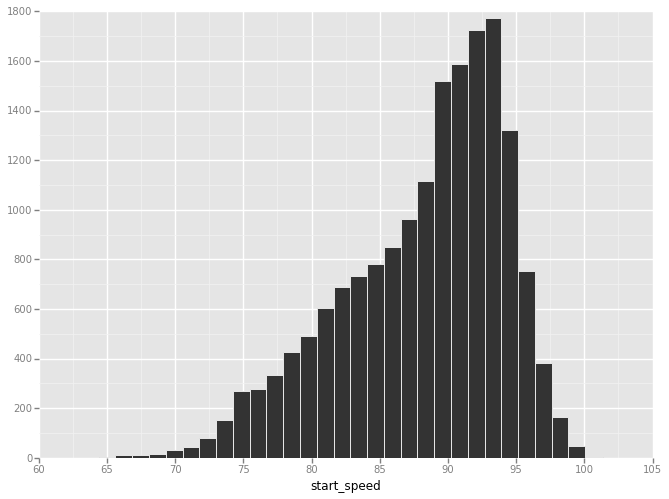

<ggplot: (36507421)>

In [11]:
ggplot(aes(x='start_speed'), data = df) + geom_histogram()
# had to change "rows" to "index" in ggplot/stats/stat_bin.py, 
# on line 126-127 manually for this to work

WHat about specific pitches?

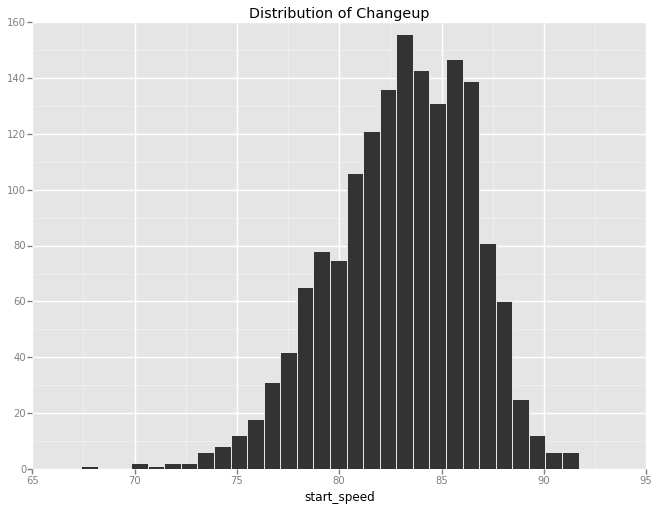

<ggplot: (33909739)>


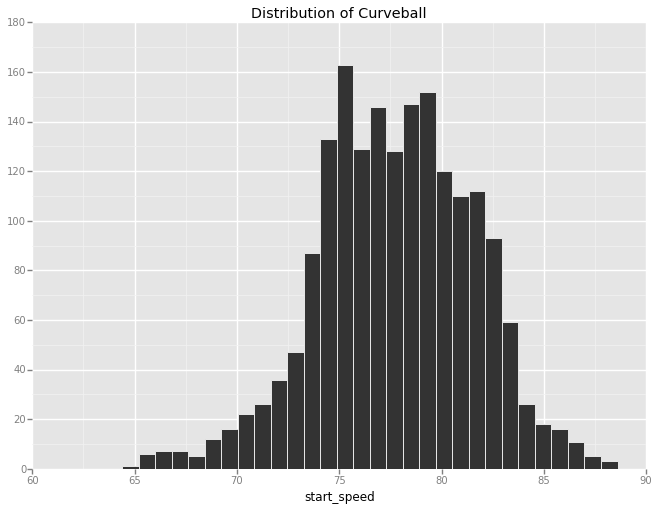

<ggplot: (36268965)>


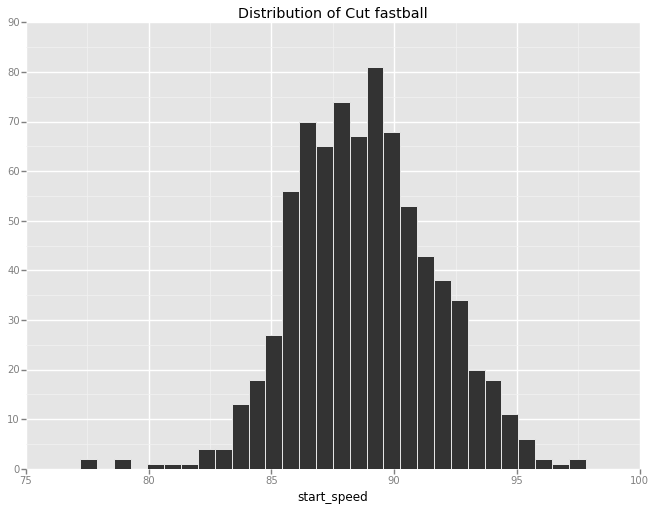

<ggplot: (34955005)>


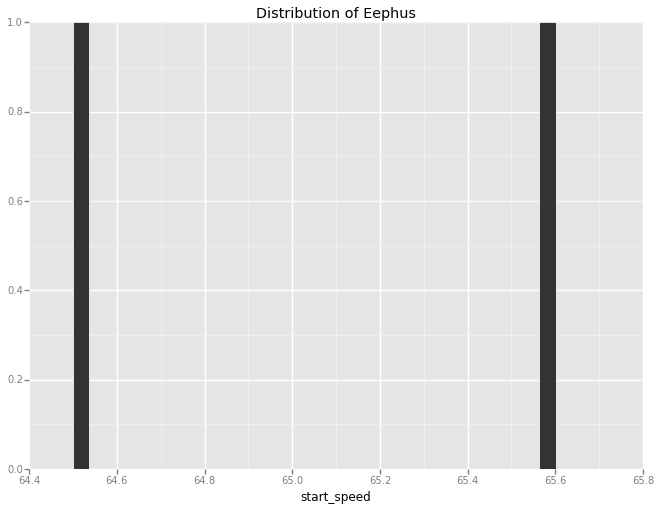

<ggplot: (35199559)>


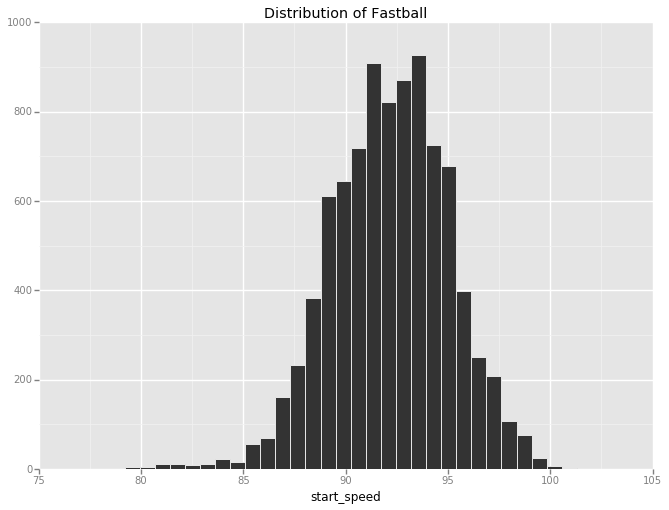

<ggplot: (35239540)>


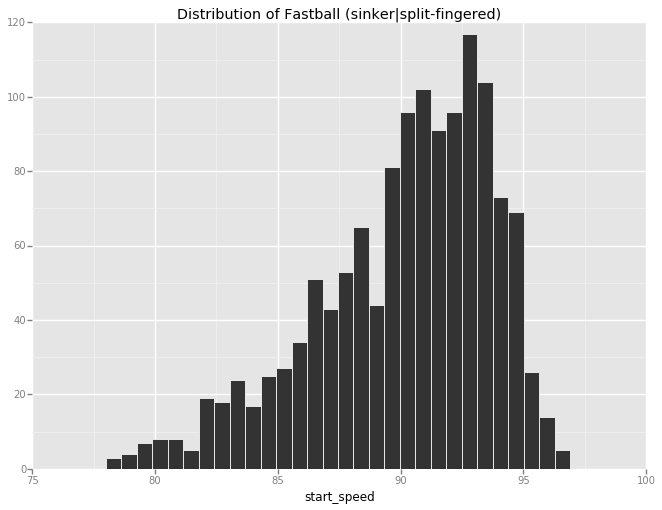

<ggplot: (35156070)>


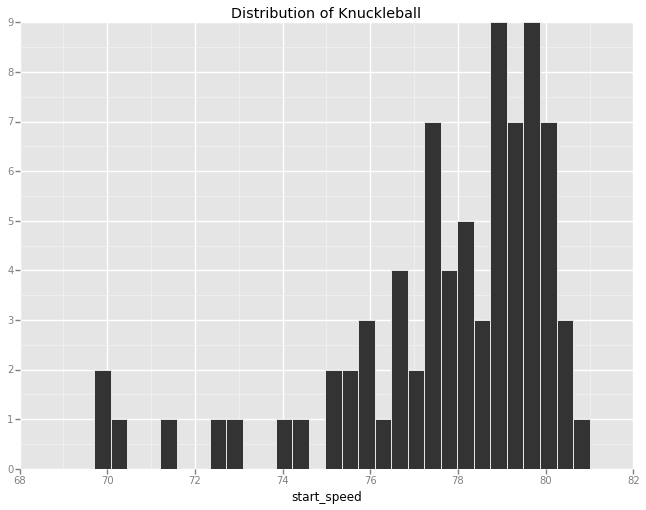

<ggplot: (36887468)>


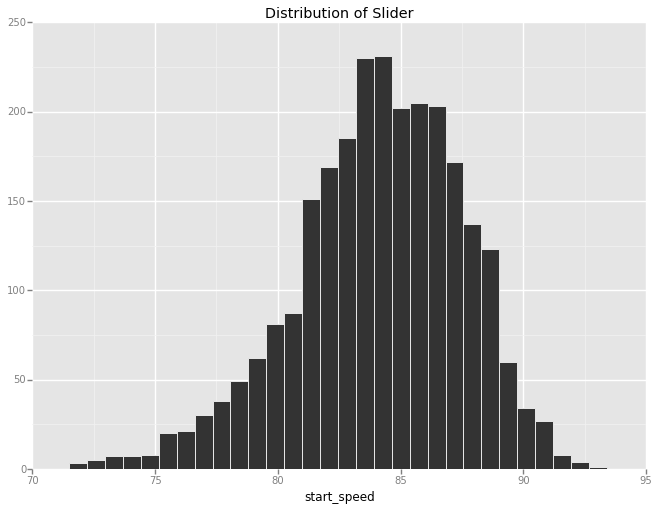

<ggplot: (35104761)>


In [12]:
df_pitchname = df.groupby("pitch_name")
for name, frame in df_pitchname:
    print ggplot(aes(x='start_speed'), data=frame) + geom_histogram() + ggtitle("Distribution of " + str(name))

That was helpful but I'm sort of on plot overload now.

## facet_wrap FTW

### Use the trellis.

"Trellis Graphics is a family of techniques for viewing complex, multi-variable data sets." [Read more](https://www.stat.auckland.ac.nz/~ihaka/787/lectures-trellis.pdf)

C:\Users\seeth_000\Anaconda2\lib\site-packages\ggplot\ggplot.py:200: RuntimeWarning: Facetting is currently not supported with geom_bar. See
                    https://github.com/yhat/ggplot/issues/196 for more information
  warnings.warn(msg, RuntimeWarning)
C:\Users\seeth_000\Anaconda2\lib\site-packages\ggplot\geoms\geom_bar.py:47: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  _reset = self.bottom == None or (self.ax != None and self.ax != ax)


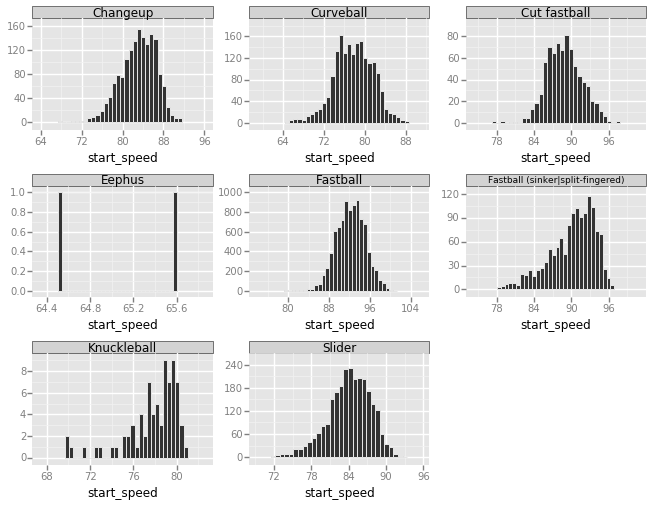

<ggplot: (36834669)>

In [13]:
ggplot(aes(x='start_speed'), data=df) + geom_histogram() + facet_wrap('pitch_name')

#Changeup, Curveball, Cut Fastball, Eephus....Wait, what?

http://en.wikipedia.org/wiki/Eephus_pitch

In [14]:
from IPython.display import YouTubeVideo
YouTubeVideo("ikLlRT2j7EQ")

Ok so what about balls and strikes.


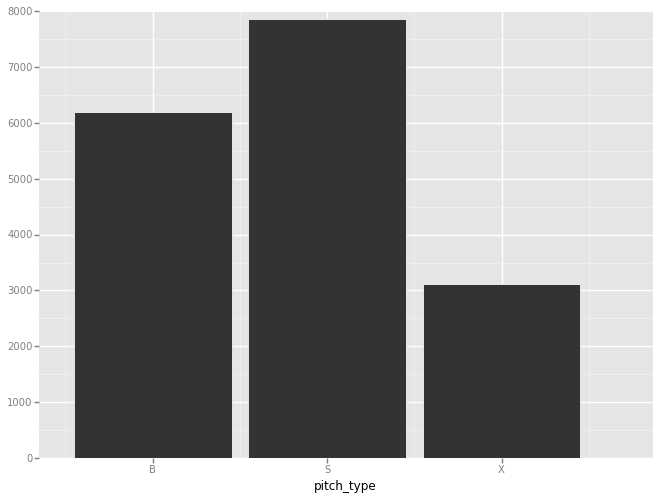

<ggplot: (37837120)>

In [15]:
ggplot(aes(x='pitch_type'), data=df) + geom_bar()

## facet_grid
(facet_wraps brother)

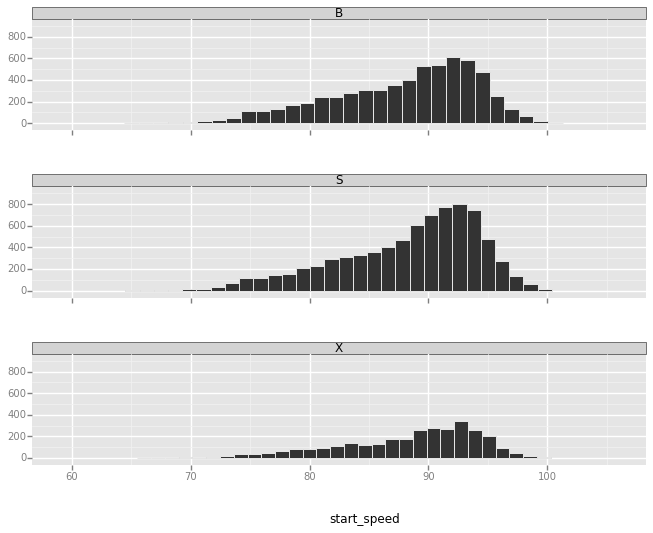

<ggplot: (35131343)>

In [16]:
ggplot(df,aes(x = 'start_speed')) + geom_histogram() + facet_grid('pitch_type')

In [30]:
#not working
#ggplot(aes(x='start_speed'),data=df)+geom_histogram()+facet_grid('pitch_type','pitch_type')#,scales="free")

## geom_density

Similar to geom_histogram but relative to y scale

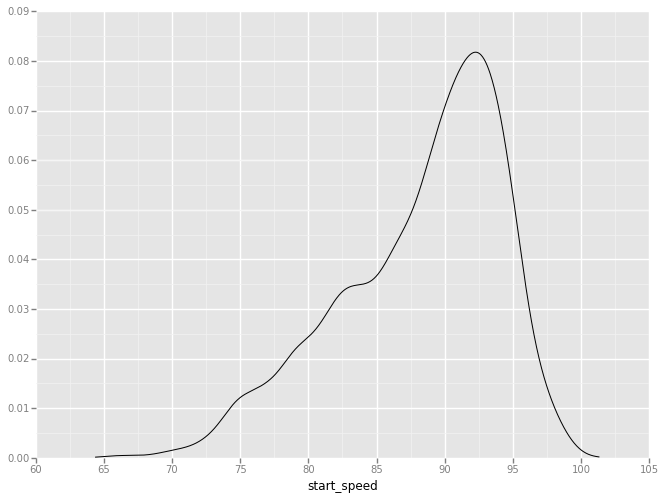

<ggplot: (46461609)>

In [20]:
ggplot(df, aes(x='start_speed')) +\
    geom_density()

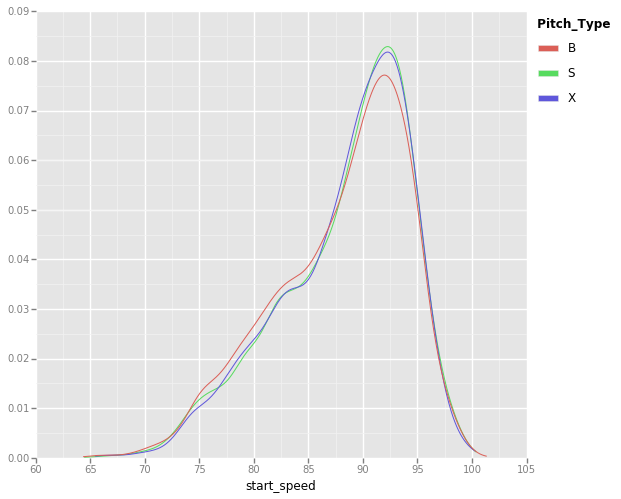

<ggplot: (53312733)>

In [33]:
ggplot(df, aes(x='start_speed', color='pitch_type' )) + geom_density()